In [2]:
import pandas as pd
import numpy as np

# Crear dataset de ejemplo de e-commerce
np.random.seed(42)
n_orders = 1000

df = pd.DataFrame({
    'order_id': range(1, n_orders + 1),
    'customer_id': np.random.randint(1, 201, n_orders),
    'product_id': np.random.randint(1, 51, n_orders),
    'quantity': np.random.randint(1, 5, n_orders),
    'unit_price': np.round(np.random.uniform(10, 500, n_orders), 2),
    'order_date': pd.date_range('2023-01-01', periods=n_orders, freq='h')[:n_orders],
    'payment_method': np.random.choice(['Credit Card', 'Debit Card', 'PayPal', 'Cash'], n_orders),
    'customer_age': np.random.normal(35, 10, n_orders).clip(18, 80).astype(int),
    'shipping_region': np.random.choice(['North', 'South', 'East', 'West'], n_orders)
})

# Introducir algunos valores faltantes
mask = np.random.random(n_orders) < 0.05
df.loc[mask, 'customer_age'] = np.nan

print("Dataset cargado exitosamente")

Dataset cargado exitosamente


In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         1000 non-null   int64         
 1   customer_id      1000 non-null   int32         
 2   product_id       1000 non-null   int32         
 3   quantity         1000 non-null   int32         
 4   unit_price       1000 non-null   float64       
 5   order_date       1000 non-null   datetime64[ns]
 6   payment_method   1000 non-null   object        
 7   customer_age     954 non-null    float64       
 8   shipping_region  1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(2)
memory usage: 58.7+ KB


,order_id,customer_id,product_id,quantity,unit_price,order_date,customer_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,954.000000
mean,500.500000,101.697000,25.680000,2.469000,253.828640,2023-01-21 19:29:59.999999744,34.694969
min,1.000000,1.000000,1.000000,1.000000,10.070000,2023-01-01 00:00:00,18.000000
25%,250.750000,51.750000,13.000000,1.000000,137.067500,2023-01-11 09:45:00,28.000000
50%,500.500000,104.000000,26.000000,2.000000,254.675000,2023-01-21 19:30:00,34.000000
75%,750.250000,150.250000,37.250000,3.000000,377.210000,2023-02-01 05:15:00,41.000000
max,1000.000000,200.000000,50.000000,4.000000,499.190000,2023-02-11 15:00:00,65.000000
std,288.819436,57.629249,14.180645,1.121739,141.648562,NaN,9.615823


In [6]:
# Dimensiones y estructura
df.shape

(1000, 9)

In [7]:
# Dimensiones y estructura
list(df.columns)

['order_id',
 'customer_id',
 'product_id',
 'quantity',
 'unit_price',
 'order_date',
 'payment_method',
 'customer_age',
 'shipping_region']

In [8]:
# Dimensiones y estructura
df.dtypes

order_id                    int64
customer_id                 int32
product_id                  int32
quantity                    int32
unit_price                float64
order_date         datetime64[ns]
payment_method             object
customer_age              float64
shipping_region            object
dtype: object

In [10]:
# Primeras y últimas filas
df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,payment_method,customer_age,shipping_region
0,1,103,40,2,371.34,2023-01-01 00:00:00,Debit Card,32.0,West
1,2,180,49,2,260.99,2023-01-01 01:00:00,Debit Card,44.0,West
2,3,93,44,3,343.31,2023-01-01 02:00:00,Credit Card,39.0,West
3,4,15,19,2,30.42,2023-01-01 03:00:00,Cash,35.0,North
4,5,107,42,2,51.55,2023-01-01 04:00:00,PayPal,36.0,North


In [11]:
# Primeras y últimas filas
df.tail()

,order_id,customer_id,product_id,quantity,unit_price,order_date,payment_method,customer_age,shipping_region
995,996,111,33,3,480.71,2023-02-11 11:00:00,Cash,53.0,South
996,997,111,13,4,106.49,2023-02-11 12:00:00,Cash,27.0,South
997,998,34,26,1,476.20,2023-02-11 13:00:00,Debit Card,37.0,South
998,999,111,22,3,497.46,2023-02-11 14:00:00,Cash,20.0,West
999,1000,8,39,1,358.74,2023-02-11 15:00:00,Cash,35.0,North


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         1000 non-null   int64         
 1   customer_id      1000 non-null   int32         
 2   product_id       1000 non-null   int32         
 3   quantity         1000 non-null   int32         
 4   unit_price       1000 non-null   float64       
 5   order_date       1000 non-null   datetime64[ns]
 6   payment_method   1000 non-null   object        
 7   customer_age     954 non-null    float64       
 8   shipping_region  1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(2)
memory usage: 58.7+ KB


In [13]:
# Valores faltantes
df.isnull().sum()

order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
payment_method      0
customer_age       46
shipping_region     0
dtype: int64

In [14]:
(1 - df.isnull().sum() / len(df)) * 100

order_id           100.0
customer_id        100.0
product_id         100.0
quantity           100.0
unit_price         100.0
order_date         100.0
payment_method     100.0
customer_age        95.4
shipping_region    100.0
dtype: float64

In [15]:
# Valores únicos por columna
print("\nValores únicos por columna:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


Valores únicos por columna:
payment_method: 4 valores únicos
shipping_region: 4 valores únicos


In [16]:
df.nunique()

order_id           1000
customer_id         198
product_id           50
quantity              4
unit_price          993
order_date         1000
payment_method        4
customer_age         46
shipping_region       4
dtype: int64

In [17]:
# Estadísticos básicos para numéricas
print("\nEstadísticos básicos de variables numéricas:")
print(df.select_dtypes(include=[np.number]).describe())


Estadísticos básicos de variables numéricas:
          order_id  customer_id   product_id     quantity   unit_price  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000   101.697000    25.680000     2.469000   253.828640   
std     288.819436    57.629249    14.180645     1.121739   141.648562   
min       1.000000     1.000000     1.000000     1.000000    10.070000   
25%     250.750000    51.750000    13.000000     1.000000   137.067500   
50%     500.500000   104.000000    26.000000     2.000000   254.675000   
75%     750.250000   150.250000    37.250000     3.000000   377.210000   
max    1000.000000   200.000000    50.000000     4.000000   499.190000   

       customer_age  
count    954.000000  
mean      34.694969  
std        9.615823  
min       18.000000  
25%       28.000000  
50%       34.000000  
75%       41.000000  
max       65.000000  


In [18]:
# Edades fuera de rango
((df['customer_age'] < 18) | (df['customer_age'] > 100)).sum()

# Cantidades inválidas
(df['quantity'] <= 0).sum()

# Precios negativos
(df['unit_price'] <= 0).sum()

np.int64(0)

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df['order_date'].is_monotonic_increasing

True

In [21]:
# Distribución por región
print("Distribución de pedidos por región:")
print(df['shipping_region'].value_counts())

Distribución de pedidos por región:
shipping_region
South    267
North    250
East     246
West     237
Name: count, dtype: int64


In [22]:
# Método de pago más popular
print(f"\nMétodo de pago más usado: {df['payment_method'].value_counts().index[0]}")


Método de pago más usado: Credit Card


In [23]:
# Rango de fechas
print(f"\nPeríodo de datos: {df['order_date'].min()} a {df['order_date'].max()}")


Período de datos: 2023-01-01 00:00:00 a 2023-02-11 15:00:00


In [24]:
# Edad promedio de clientes
edad_promedio = df['customer_age'].mean()
print(f"\nEdad promedio de clientes: {edad_promedio:.1f} años")


Edad promedio de clientes: 34.7 años


In [25]:
#Ingreso por pedido
df['order_revenue'] = df['quantity'] * df['unit_price']

In [26]:
df.groupby('shipping_region')['order_revenue'].sum().sort_values(ascending=False)

shipping_region
South    164129.64
North    155376.54
West     154867.46
East     143475.04
Name: order_revenue, dtype: float64

In [27]:
#Ticket promedio por método de pago
df.groupby('payment_method')['order_revenue'].mean().sort_values(ascending=False)

payment_method
Credit Card    659.068732
PayPal         635.915664
Cash           589.659823
Debit Card     578.050331
Name: order_revenue, dtype: float64

In [28]:
#Cantidad de pedidos por método
df['payment_method'].value_counts()

payment_method
Credit Card    276
PayPal         256
Debit Card     242
Cash           226
Name: count, dtype: int64

In [29]:
df['order_hour'] = df['order_date'].dt.hour

In [30]:
#Pedidos por hora
df['order_hour'].value_counts().sort_index()

order_hour
0     42
1     42
2     42
3     42
4     42
5     42
6     42
7     42
8     42
9     42
10    42
11    42
12    42
13    42
14    42
15    42
16    41
17    41
18    41
19    41
20    41
21    41
22    41
23    41
Name: count, dtype: int64

In [31]:
#Ingreso promedio por hora
df.groupby('order_hour')['order_revenue'].mean()

order_hour
0     753.007143
1     628.336190
2     606.345000
3     575.423571
4     525.439286
5     496.515000
6     573.841905
7     675.091190
8     577.025000
9     747.335714
10    647.280238
11    595.696667
12    676.744762
13    608.055238
14    568.021190
15    598.063333
16    577.149268
17    672.809024
18    613.936341
19    722.321951
20    720.718780
21    528.995122
22    604.929268
23    536.100732
Name: order_revenue, dtype: float64

In [32]:
df_age = df.dropna(subset=['customer_age'])

In [33]:
#Gasto promedio por edad
df_age.groupby('customer_age')['order_revenue'].mean().head()

customer_age
18.0    524.377170
19.0    493.178182
20.0    820.494615
21.0    360.163333
22.0    547.448421
Name: order_revenue, dtype: float64

In [34]:
df_age['age_group'] = pd.cut(
    df_age['customer_age'],
    bins=[18, 25, 35, 45, 55, 80],
    labels=['18-25', '26-35', '36-45', '46-55', '56+']
)

df_age.groupby('age_group')['order_revenue'].mean()

C:\Users\vylo0\AppData\Local\Temp\ipykernel_11320\969590658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['age_group'] = pd.cut(
C:\Users\vylo0\AppData\Local\Temp\ipykernel_11320\969590658.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age.groupby('age_group')['order_revenue'].mean()


age_group
18-25    587.048067
26-35    638.754577
36-45    629.632155
46-55    625.828730
56+      456.588750
Name: order_revenue, dtype: float64

In [36]:
df_age = df.dropna(subset=['customer_age']).copy()

df_age['age_group'] = pd.cut(
    df_age['customer_age'],
    bins=[18, 25, 35, 45, 55, 80],
    labels=['18-25', '26-35', '36-45', '46-55', '56+']
)

df_age.groupby('age_group', observed=True)['order_revenue'].mean()

age_group
18-25    587.048067
26-35    638.754577
36-45    629.632155
46-55    625.828730
56+      456.588750
Name: order_revenue, dtype: float64

In [37]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [38]:
from openpyxl import Workbook
from openpyxl.chart import PieChart, BarChart, Reference
from openpyxl.utils.dataframe import dataframe_to_rows
import pandas as pd
import numpy as np

In [39]:
# Ingreso por pedido
df['order_revenue'] = df['quantity'] * df['unit_price']

In [40]:
# Distribución por región
region_dist = df['shipping_region'].value_counts().reset_index()
region_dist.columns = ['shipping_region', 'orders']

# Distribución por método de pago
payment_dist = df['payment_method'].value_counts().reset_index()
payment_dist.columns = ['payment_method', 'orders']

# Datos de edad (sin nulos)
df_age = df.dropna(subset=['customer_age']).copy()

# Agrupar edades
df_age['age_group'] = pd.cut(
    df_age['customer_age'],
    bins=[18, 25, 35, 45, 55, 80],
    labels=['18-25', '26-35', '36-45', '46-55', '56+']
)

# Gasto promedio por grupo etario
age_revenue = (
    df_age.groupby('age_group', observed=True)['order_revenue']
    .mean()
    .reset_index()
)

In [41]:
wb = Workbook()

In [42]:
ws_region = wb.active
ws_region.title = "Distribucion_Region"

for r in dataframe_to_rows(region_dist, index=False, header=True):
    ws_region.append(r)

pie_region = PieChart()
labels = Reference(ws_region, min_col=1, min_row=2, max_row=ws_region.max_row)
data = Reference(ws_region, min_col=2, min_row=1, max_row=ws_region.max_row)

pie_region.add_data(data, titles_from_data=True)
pie_region.set_categories(labels)
pie_region.title = "Distribución de pedidos por región"

ws_region.add_chart(pie_region, "D2")

In [43]:
ws_payment = wb.create_sheet("Distribucion_Pago")

for r in dataframe_to_rows(payment_dist, index=False, header=True):
    ws_payment.append(r)

pie_payment = PieChart()
labels = Reference(ws_payment, min_col=1, min_row=2, max_row=ws_payment.max_row)
data = Reference(ws_payment, min_col=2, min_row=1, max_row=ws_payment.max_row)

pie_payment.add_data(data, titles_from_data=True)
pie_payment.set_categories(labels)
pie_payment.title = "Distribución por método de pago"

ws_payment.add_chart(pie_payment, "D2")

In [44]:
ws_age = wb.create_sheet("Edad_Clientes")

age_counts = df_age['customer_age'].value_counts().sort_index().reset_index()
age_counts.columns = ['edad', 'frecuencia']

for r in dataframe_to_rows(age_counts, index=False, header=True):
    ws_age.append(r)

bar_age = BarChart()
data = Reference(ws_age, min_col=2, min_row=1, max_row=ws_age.max_row)
cats = Reference(ws_age, min_col=1, min_row=2, max_row=ws_age.max_row)

bar_age.add_data(data, titles_from_data=True)
bar_age.set_categories(cats)
bar_age.title = "Distribución de edad de clientes"
bar_age.x_axis.title = "Edad"
bar_age.y_axis.title = "Frecuencia"

ws_age.add_chart(bar_age, "D2")

In [45]:
ws_age_rev = wb.create_sheet("Gasto_Promedio_Edad")

for r in dataframe_to_rows(age_revenue, index=False, header=True):
    ws_age_rev.append(r)

bar_rev = BarChart()
data = Reference(ws_age_rev, min_col=2, min_row=1, max_row=ws_age_rev.max_row)
cats = Reference(ws_age_rev, min_col=1, min_row=2, max_row=ws_age_rev.max_row)

bar_rev.add_data(data, titles_from_data=True)
bar_rev.set_categories(cats)
bar_rev.title = "Gasto promedio por grupo de edad"
bar_rev.y_axis.title = "Ingreso promedio"

ws_age_rev.add_chart(bar_rev, "D2")

In [46]:
wb.save("Evidencia_EDA_Ecommerce.xlsx")

In [47]:
import matplotlib.pyplot as plt

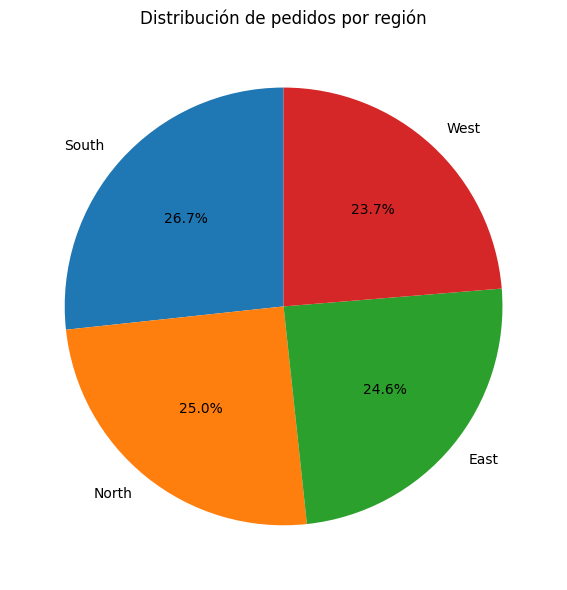

In [48]:
region_counts = df['shipping_region'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    region_counts,
    labels=region_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribución de pedidos por región')
plt.tight_layout()
plt.savefig('distribucion_region.png', dpi=300)
plt.show()

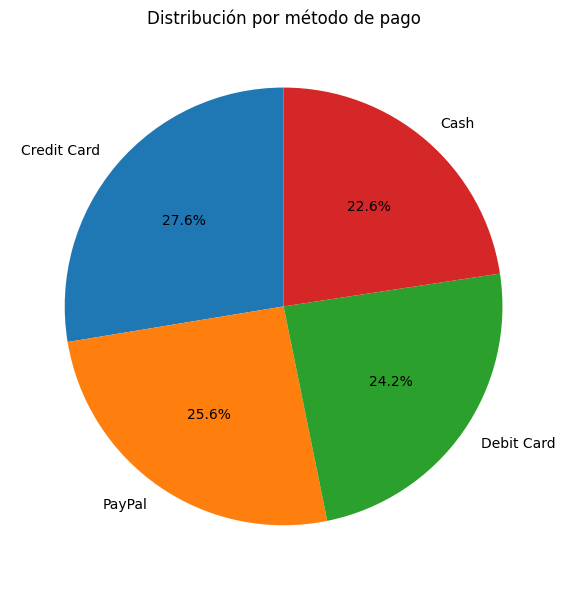

In [49]:
payment_counts = df['payment_method'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    payment_counts,
    labels=payment_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribución por método de pago')
plt.tight_layout()
plt.savefig('distribucion_metodo_pago.png', dpi=300)
plt.show()

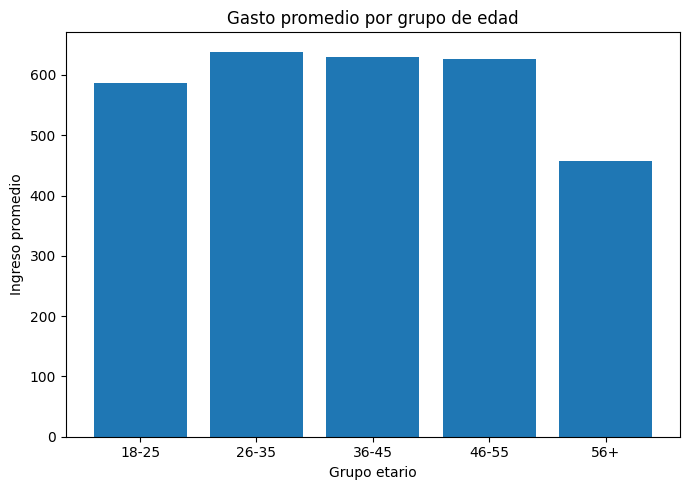

In [50]:
plt.figure(figsize=(7, 5))
plt.bar(age_revenue['age_group'], age_revenue['order_revenue'])
plt.title('Gasto promedio por grupo de edad')
plt.xlabel('Grupo etario')
plt.ylabel('Ingreso promedio')
plt.tight_layout()
plt.savefig('gasto_promedio_por_edad.png', dpi=300)
plt.show()

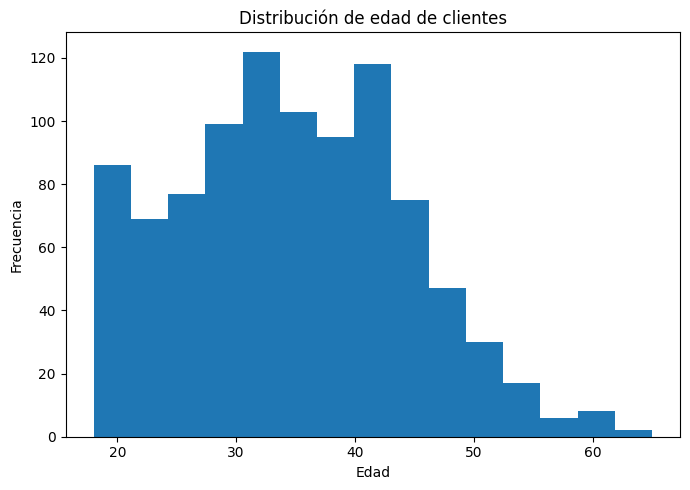

In [51]:
plt.figure(figsize=(7, 5))
plt.hist(df['customer_age'].dropna(), bins=15)
plt.title('Distribución de edad de clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig('histograma_edad_clientes.png', dpi=300)
plt.show()